In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



In [2]:
df = pd.read_csv('dataset_nasabah.csv')

In [3]:
df.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,Pria,Ya,30.7,1,4744854
1,2,26,Pria,Ya,28.2,0,0
2,3,19,Pria,Ya,22.3,4,5780796
3,4,53,Pria,Tidak,22.1,4,22669060
4,5,69,Pria,Ya,30.0,2,11323814


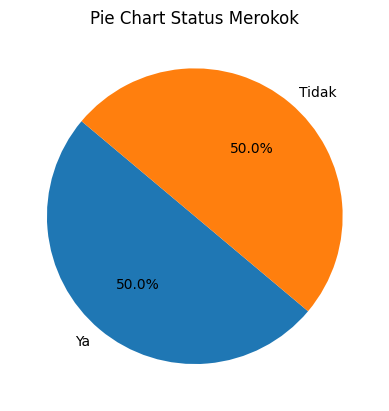

In [4]:
# Pie chart Status Merokok
df['Status Merokok'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart Status Merokok")
plt.ylabel("")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_6196\3190837058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jumlah Klaim', y='Jenis Kelamin', data=df, palette='Set1')


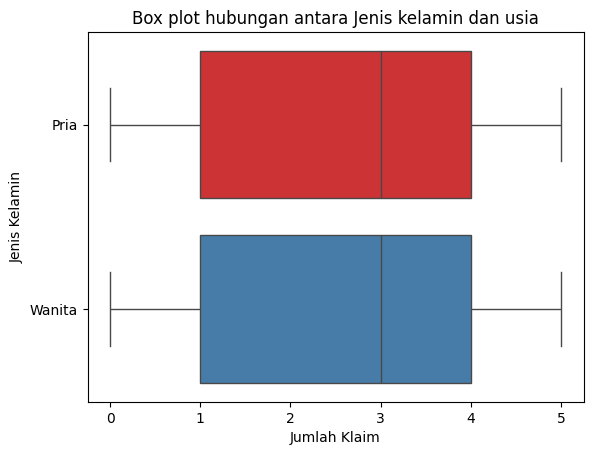

In [5]:
# Box Plot
sns.boxplot(x='Jumlah Klaim', y='Jenis Kelamin', data=df, palette='Set1')
plt.title("Box plot hubungan antara Jenis kelamin dan usia")
plt.xlabel("Jumlah Klaim")
plt.ylabel("Jenis Kelamin")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_6196\1742999708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Jenis Kelamin', y='Usia', data=df, palette='pastel')


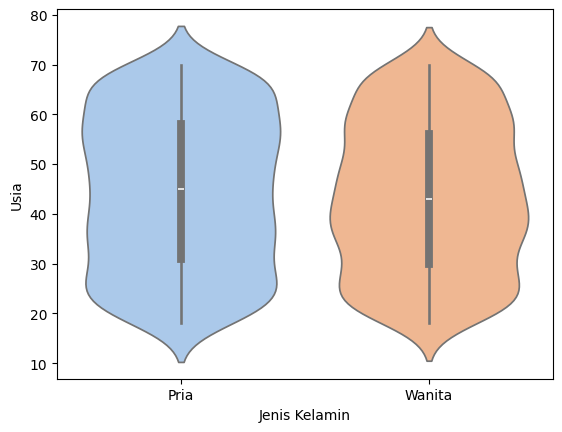

In [6]:
# Violin Plot
sns.violinplot(x='Jenis Kelamin', y='Usia', data=df, palette='pastel')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Usia")
plt.show()

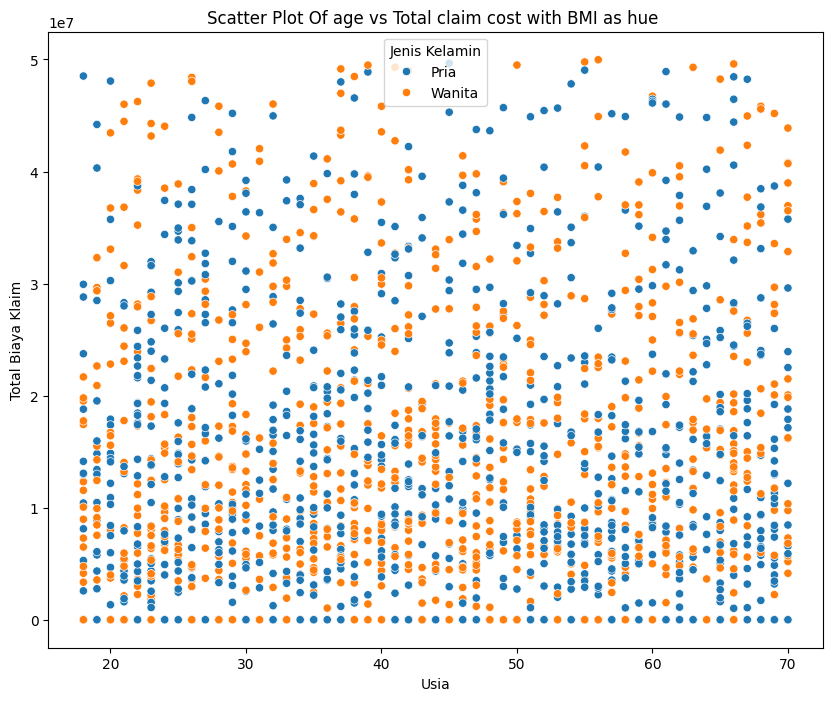

In [7]:
# Scatter Plot hubungan antara Usia dan total biaya klaim dengan hue BMI
plt.figure(figsize=(10,8))
sns.scatterplot(x='Usia', y='Total Biaya Klaim', hue='Jenis Kelamin', data=df)
plt.title("Scatter Plot Of age vs Total claim cost with BMI as hue ")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_6196\1432922531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jumlah Klaim', data=df, palette='Set1')


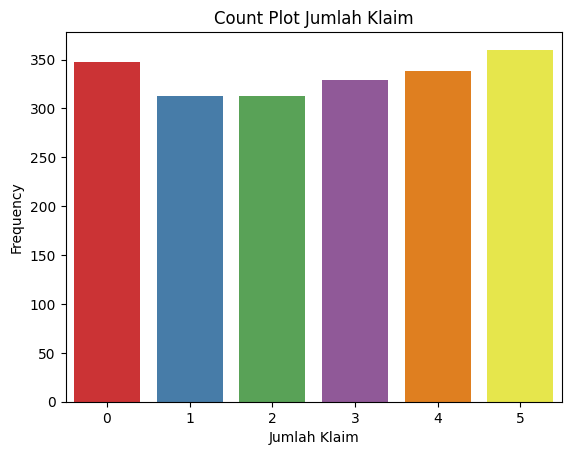

In [8]:
# Count Plot Jumlah Klaim
sns.countplot(x='Jumlah Klaim', data=df, palette='Set1')
plt.title("Count Plot Jumlah Klaim")
plt.xlabel("Jumlah Klaim")
plt.ylabel("Frequency")
plt.show()

# Data Preprocessing

In [9]:
#Pra Pemrosesan data
# Konversi kolom kategorikal menjadi numberik
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Pria': 0, 'Wanita':1})
df['Status Merokok'] = df['Status Merokok'].map({'Tidak': 0, 'Ya':1})

In [10]:
df.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,0,1,30.7,1,4744854
1,2,26,0,1,28.2,0,0
2,3,19,0,1,22.3,4,5780796
3,4,53,0,0,22.1,4,22669060
4,5,69,0,1,30.0,2,11323814


# Feature Clustering


In [11]:
# Select Feature for clustering

feature = ['Usia','Jenis Kelamin','Status Merokok','BMI', 'Jumlah Klaim', 'Total Biaya Klaim']
X = df[feature]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Create Linkage matrix for dendogram
linked =linkage(X_scaled, method='ward')

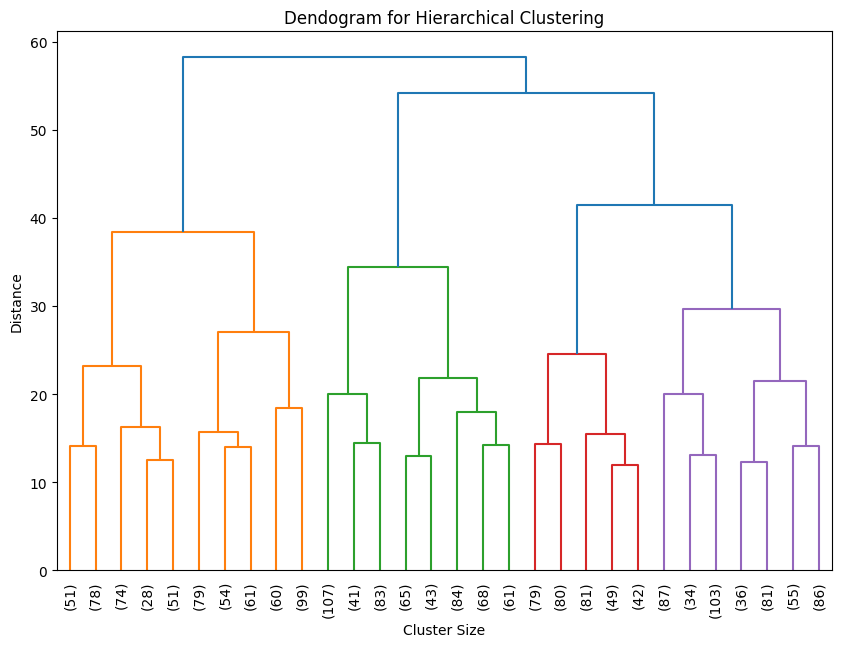

In [14]:
# Plot Dendogram
plt.figure(figsize=(10,7))
plt.title("Dendogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [15]:
# Membuat Cluster Label
cluster_labels = cut_tree(linked, n_clusters=5).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 4, 4], dtype=int64)

In [16]:
# Gabungkan cluster label dengan data
df['Cluster_Labels'] = cluster_labels

In [17]:
df.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim,Cluster_Labels
0,1,58,0,1,30.7,1,4744854,0
1,2,26,0,1,28.2,0,0,0
2,3,19,0,1,22.3,4,5780796,0
3,4,53,0,0,22.1,4,22669060,1
4,5,69,0,1,30.0,2,11323814,0


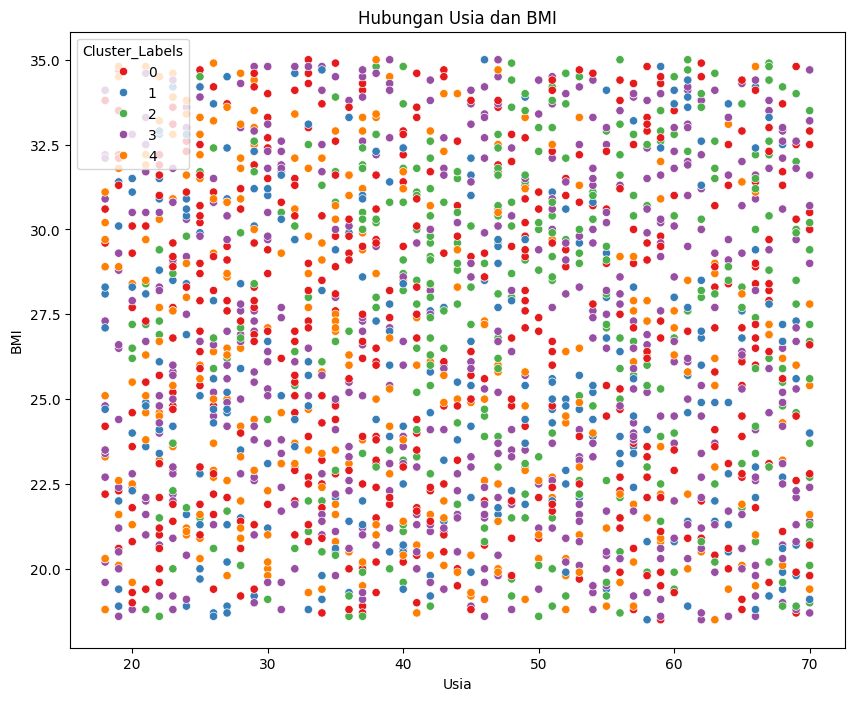

In [18]:
# Distribusi BMI berdasarkan jumlah Usia
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,
                x='Usia',
                y='BMI',
                hue='Cluster_Labels',
                palette='Set1')
plt.title("Hubungan Usia dan BMI")
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_6196\1969894925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


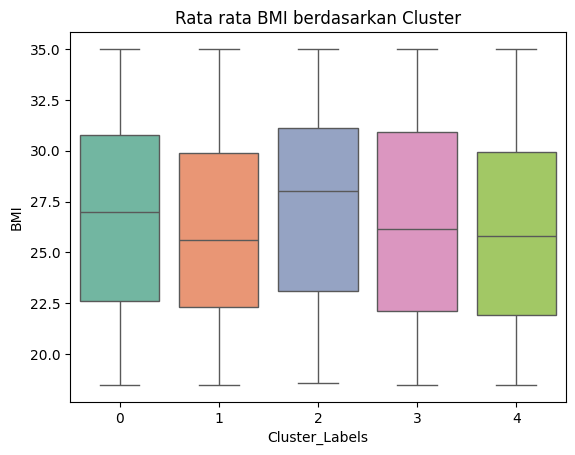

In [19]:
# Pengelompokan BMI dengan Cluster label berjumlah 5 kelompok/cluster
sns.boxplot(data=df,
            x="Cluster_Labels",
            y="BMI",
            palette='Set2')
plt.title("Rata rata BMI berdasarkan Cluster")
plt.show()